## This notebook is aimed at solving classification problems using logistic regression with gradient descent

In [1]:
from sklearn.metrics import log_loss
from sklearn.linear_model import LogisticRegression
from sklearn import datasets
iris = datasets.load_iris()
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import accuracy_score

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

### This section will be for binary logistic regression

In [2]:
# Using two classes for logistic regression
X = iris.data[:, :2][0:100]
y = iris.target[0:100]
y_c = iris.target[0:100]
y.shape = (100,1)

assert y.shape == (100,1)
assert X.shape == (100,2)
assert y_c.shape == (100,)

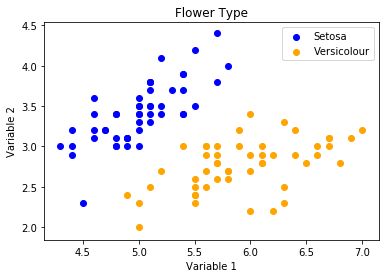

In [3]:
# This data seems to be linerly separable
plt.scatter(X[:,0][0:50], X[:,1][0:50], c="blue", label="Setosa")
plt.scatter(X[:,0][50:100], X[:,1][50:100], c="orange", label="Versicolour")
plt.xlabel("Variable 1")
plt.ylabel("Variable 2")
plt.title("Flower Type")
plt.legend()
plt.show()

### Sigmoid activation function

$$ h_\theta(x) = \frac{1}{1+e^{-x}} $$

In [4]:
# Returns the sigmoid activation of input 
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

### Logistic regression cost function (log loss)

$$ J(\theta) = - \frac{1}{m}\sum_{i=1}^{m}y^{(i)}log(h_\theta(x^{(i)}))+
(1-y^{(i)})log(1-h_\theta(x^{(i)})$$
$$ note: h_\theta(x^{(i)}) = \frac{1}{1+e^{-(bias+X\theta.T)}}$$

In [5]:
# Log loss for logistic regression
def get_cost(X,y,weight,bias):
    return -np.average(y*np.log(sigmoid(bias+np.dot(X,weight.T)))+(1-y)*np.log(1-(sigmoid(bias+np.dot(X,weight.T)))))

In [6]:
# Testing cost function
weight = np.array([[0],[0]])
weight.shape = (1,2)
bias = 1

assert weight.shape == (1,2)

In [7]:
# Ensuring our cost function is working properly using sklearn implementation
assert get_cost(X,y,weight,bias) == log_loss(y,sigmoid(bias+np.dot(X,weight.T)))

### Updating weight and bias terms

$$ \begin{split} & f^\prime(W) = \frac{1}{m}\big[h_\theta(x^{(i)})-y^{(i)})x_j^{(i)}\big] \\ 
& f^\prime(Bias) = \frac{1}{m}\big[h_\theta(x^{(i)})-y^{(i)})\big] \end{split} $$

In [8]:
# Updates the weights and bias terms based on gradient descent
def update_param(X,y,weight,bias,lr=0.01):
    """
    X.shape = (100,2)
    y.shape = (100,1)
    weight.shape = (1,2)
    """
    df_dm = (1/len(X)) * np.dot((sigmoid(np.dot(X,weight.T))-y).T,X)    
    df_db = np.average(sigmoid(np.dot(X,weight.T))-y)
    weight = weight - (lr * df_dm)
    bias = bias - (lr * df_db)
    return weight,bias

In [9]:
def train_model(X,y,weight,bias,iters,lr=0.01):
    costs = []
    for i in range(iters):
        weight,bias = update_param(X,y,weight,bias,lr)
        cost = get_cost(X,y,weight,bias)
        costs.append(cost)
        
    return weight,bias,costs

In [10]:
# Returns the prediction for any given X variable
def predictions(X,weight,bias):
    """
    X.shape = (100,2)
    weight = (1,2)
    """
    return sigmoid(bias + np.dot(X,weight.T))

In [11]:
# Parameters for testing out my logistic regression model
model_weights = np.array([[0],[0]])
model_weights.shape = (1,2)
model_bias = 0

assert model_weights.shape == (1,2)

In [12]:
# Trying out the logistic regression model
ret_weight,ret_bias,ret_costs = train_model(X,y,model_weights,model_bias,15000,0.01)

In [13]:
time_multi = [i for i in range(15000)]

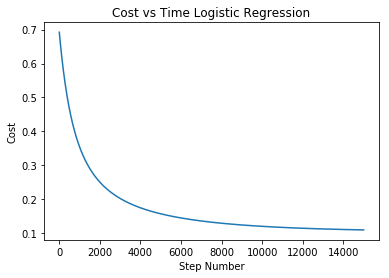

In [14]:
# Graphing my cost function
plt.plot(time_multi, ret_costs)
plt.title("Cost vs Time Logistic Regression")
plt.xlabel("Step Number")
plt.ylabel("Cost")
plt.show()

In [15]:
# Getting predicted values
pred = predictions(X,ret_weight,ret_bias)
pred_2 = predictions(X,ret_weight,ret_bias)
pred.shape

(100, 1)

In [16]:
# Turning predictions into binary classifications
pred[pred >= 0.5] = 1
pred[pred < 0.5] = 0

#### Overall my model performed very similar to the sklearn model

In [17]:
# Comparing my coefficients and score to sklearn coefficients
accuracy = accuracy_score(y,pred)
print("Accuracy:", accuracy)
print("Weights:", ret_weight)
print("Bias:", ret_bias)
print("Final cost:", ret_costs[-1])

Accuracy: 0.97
Weights: [[ 3.41611769 -5.98443028]]
Bias: -0.9809741352997097
Final cost: 0.10876641233564883


In [18]:
# Using sklearn's logistic regression to determine the ideal params
lr = LogisticRegression()
lr.fit(X, y)
predictedVals = lr.predict(X)
predictedProb = lr.predict_proba(X)

print("Accuracy: " + str(lr.score(X, y)))
print("Coefs: " + str(lr.coef_))
print("Intercept: " + str(lr.intercept_))
print("Final cost:", log_loss(y, predictedProb))

Accuracy: 0.99
Coefs: [[ 2.21657376 -3.69152337]]
Intercept: [-0.59901124]
Final cost: 0.15306505302429574


### I will attempt to use regularization to see if my model improves (lambda will be my regularization term)

This involves updating the derivative term for weights:

$$ f^\prime(W) = \frac{1}{m}\big[h_\theta(x^{(i)})-y^{(i)})x_j^{(i)} \big] + \frac{\lambda}{m}\theta_j $$ 
$$ \theta_j := \theta_j(1-\alpha\frac{\lambda}{m}) - \alpha\frac{1}{m}\big[h_\theta(x^{(i)})-y^{(i)})x_j^{(i)} \big]$$

This also involves updating the cost function to include regularization:

$$ J(\theta) = - \frac{1}{m}\sum_{i=1}^{m}y^{(i)}log(h_\theta(x^{(i)}))+
(1-y^{(i)})log(1-h_\theta(x^{(i)}) + \frac{\lambda}{2m}\sum_{j=1}^{n}\theta_j^2$$

In [19]:
# Log loss for logistic regression
def get_cost_reg(X,y,weight,bias,lmbda):
    inner = (y*np.log(sigmoid(bias+np.dot(X,weight.T)))+(1-y)*np.log(1-(sigmoid(bias+np.dot(X,weight.T)))))
    return -np.average(inner+((lmbda/(2*len(X))*np.sum(weight**2))))

In [20]:
# Updates the weights and bias terms based on gradient descent
def update_param_reg(X,y,weight,bias,lr,lmbda):
    """
    X.shape = (100,2)
    y.shape = (100,1)
    weight.shape = (1,2)
    """
    df_dm = (1/len(X)) * np.dot((sigmoid(np.dot(X,weight.T))-y).T,X) #may need a negative
    df_db = np.average(sigmoid(np.dot(X,weight.T))-y)
    weight = weight * (1-lr*(lmbda/len(X))) - (lr * df_dm)
    bias = bias - (lr * df_db)
    return weight,bias

In [21]:
def train_model_reg(X,y,weight,bias,iters,lmbda,lr=0.01):
    costs = []
    for i in range(iters):
        weight,bias = update_param_reg(X,y,weight,bias,lr,lmbda)
        cost = get_cost_reg(X,y,weight,bias,lmbda)
        costs.append(cost)
        
    return weight,bias,costs

In [22]:
# Initializing params to test my regularized model
reg_weight = np.array([[0,0]])
reg_bias = 0
assert reg_weight.shape == (1,2)

In [23]:
lmbdas = [0.1,0.5,1,3,5]
end_costs = []
for lmbda in lmbdas:
    _,_,reg_costs = train_model_reg(X,y,reg_weight,reg_bias,10000,lmbda,0.01)
    end_costs.append(reg_costs[-1])
    print("lambda value:{}, end cost: {}".format(lmbda,reg_costs[-1]))

lambda value:0.1, end cost: 0.11042435898469016
lambda value:0.5, end cost: 0.0976078377598351
lambda value:1, end cost: 0.10851937681536368
lambda value:3, end cost: 0.20778001817220307
lambda value:5, end cost: 0.29857256585117115


In [24]:
reg_weight = np.array([[0,0]])
reg_bias = 0
assert reg_weight.shape == (1,2)

In [25]:
# It seems the lambda value of 0.5 worked the best so I will test the accuracy of that model
# Note that the new final cost value is smaller than my model without regularization
reg_weight,reg_bias,reg_costs = train_model_reg(X,y,reg_weight,reg_bias,13000,0.5,0.01)

In [26]:
# Checking the accuracy score of my new model
""" Although the cost is lower, the accuracy is lower. This is not surprising given that increasing regularization
    ultimately is meant to reduce overfitting and I havn't done any train test split and thus overfitting on the 
    training data in this case would lead to a higher accuracy score. 
"""
reg_pred = predictions(X,reg_weight,reg_bias)
reg_pred[reg_pred >= 0.5] = 1
reg_pred[reg_pred < 0.5] = 0
accuracy = accuracy_score(y,reg_pred)
print("Accuracy:", accuracy)

Accuracy: 0.94


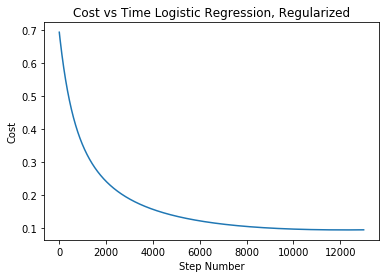

In [27]:
time_multi = [i for i in range(13000)]
# Graphing my cost function
plt.plot(time_multi, reg_costs)
plt.title("Cost vs Time Logistic Regression, Regularized")
plt.xlabel("Step Number")
plt.ylabel("Cost")
plt.show()